Programme de CAH


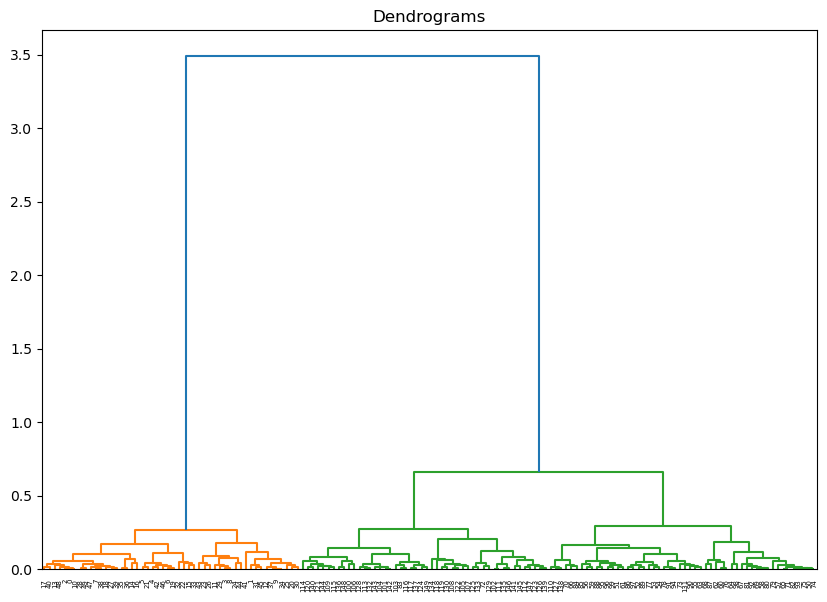

In [1]:
###                  PROGRAMMES  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
print("Programme de CAH")
%matplotlib inline
data = pd.read_csv(("iris.csv"), names=['sepal length',
'sepal width','petal length','petal width'], 
usecols=['sepal length','sepal width','petal length',
         'petal width'])

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['sepal length'], data_scaled['sepal width'], c=cluster.labels_) 


In [ ]:
import numpy as np
%pip install seaborn
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import numpy as np
print("Programme de CPA")
 
def PCA(X , num_components):
     
    #Etape- numero 1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Etape- numero 2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Etape- numero 3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Etape- numero 4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Etape- numero 5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Etape- numero 6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

   
data = pd.read_csv(("iris.csv"), names=['sepal length','sepal width','petal length','petal width','target'])
x = data.iloc[:,0:4]
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

print(principal_df)
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print("Programme de  Kmeans")

# Chargement des données à partir d'un fichier CSV
df = pd.read_csv(("iris.csv"), names=['sepal length','sepal width','petal length',
                                        
            'petal width', 'target'], usecols=['sepal length','sepal width',
                                                                 'target',])

# Sélection des colonnes à utiliser pour le clustering
X = df[['sepal length', 'sepal width']]

# Entraînement de l'algorithme sur les données
kmeans = KMeans(n_clusters=4).fit(X)

# Ajout de la colonne des labels de cluster au dataframe
df['target'] = kmeans.labels_

# Visualisation des données en utilisant une projection en 2D
plt.scatter(df['sepal length'], df['sepal width'], c=df['target'], cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
print("Programme de  regression linéaire")
def predict(x):
    return slope * x + intercept
data = pd.read_csv(("iris.csv"), names=['sepal length','sepal width','petal length',
                                        
            'petal width', 'target'], usecols=['sepal length','sepal width'])
X =  df.iloc[0:len(df),0] #selection de la première colonne de notre dataset
Y =  df.iloc[0:len(df),1]
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.show()



In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
print("fProgramme d' anova")
data= pd.read_csv(('iris.csv'), names=['sepal_length','sepal_width','petal_length',
                                        
            'petal_width', 'target'])
data.head()

mod = ols('sepal_length ~ target',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
pair_t = mod.t_test_pairwise('target')
pair_t.result_frame

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Importing Sklearn module and classes
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
print("Programme de regression logistique")
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
	
# Create an instance of LogisticRegression classifier
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
 
# Fit the model
#
lr.fit(X_train_std, Y_train)

# Create the predictions
#
Y_predict = lr.predict(X_test_std)
 
# Use metrics.accuracy_score to measure the score
print("Précision :  %.3f" %metrics.accuracy_score(Y_test, Y_predict))


